Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Videos: ['crosswalk.avi', 'fourway.avi', 'night.avi']
Annotations: ['crosswalk.csv', 'fourway.csv', 'night.csv']


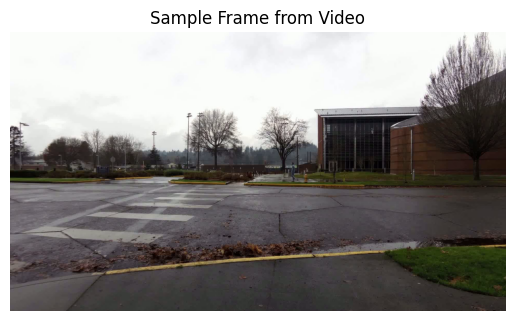

Annotation sample:
      x    y   w   h
0  1074  499  37  75
1  1072  499  38  77
2  1068  497  41  82
3  1066  498  41  82
4  1062  498  42  85


In [ ]:
# STEP 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Path to your dataset in Drive
DATASET_PATH = "/content/drive/MyDrive/pedestrian_dataset"
VIDEOS_PATH = DATASET_PATH + "/videos"
ANNOTATIONS_PATH = DATASET_PATH + "/annotations"

import os

print("Videos:", os.listdir(VIDEOS_PATH))
print("Annotations:", os.listdir(ANNOTATIONS_PATH))

# STEP 2: Extract frames from a sample video
import cv2
import matplotlib.pyplot as plt

video_file = os.path.join(VIDEOS_PATH, os.listdir(VIDEOS_PATH)[0])
cap = cv2.VideoCapture(video_file)

frames = []
for i in range(5):   # extract first 5 frames for testing
    ret, frame = cap.read()
    if not ret:
        break
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frames.append(frame)

cap.release()

# Show first frame
plt.imshow(frames[0])
plt.title("Sample Frame from Video")
plt.axis("off")
plt.show()

# STEP 3: Load annotations (CSV or Excel)
import pandas as pd

annotation_file = os.path.join(ANNOTATIONS_PATH, os.listdir(ANNOTATIONS_PATH)[0])

if annotation_file.endswith(".csv"):
    df = pd.read_csv(annotation_file)
else:
    df = pd.read_excel(annotation_file)

print("Annotation sample:")
print(df.head())

In [ ]:
import cv2
import os
import pandas as pd
from tqdm import tqdm

# Paths
video_folder = "/content/drive/MyDrive/pedestrian_dataset/videos"
annotation_folder = "/content/drive/MyDrive/pedestrian_dataset/annotations"
output_folder = "/content/drive/MyDrive/pedestrian_dataset/frames"

# Create output folders
os.makedirs(output_folder, exist_ok=True)
os.makedirs(os.path.join(output_folder, "day"), exist_ok=True)
os.makedirs(os.path.join(output_folder, "night"), exist_ok=True)

# Helper: decide if file is day or night (based on filename convention)
def classify_video(filename):
    name = filename.lower()
    if "night" in name:
        return "night"
    else:
        return "day"

# Extract frames and save annotations
for video_file in tqdm(os.listdir(video_folder)):
    if not video_file.endswith(".avi"):
        continue

    # Decide if video is day or night
    condition = classify_video(video_file)

    video_path = os.path.join(video_folder, video_file)
    cap = cv2.VideoCapture(video_path)

    frame_count = 0
    success = True

    # Load corresponding annotation CSV (if available)
    ann_file = video_file.replace(".avi", ".csv")
    ann_path = os.path.join(annotation_folder, ann_file)
    annotations = None
    if os.path.exists(ann_path):
        if ann_path.endswith(".csv"):
            annotations = pd.read_csv(ann_path)
        else: # Assuming excel
             annotations = pd.read_excel(ann_path)

        # Add a 'frame' column to annotations.
        # This assumes that each set of bounding boxes in the annotation file
        # corresponds sequentially to the frames in the video.
        # You might need to adjust this logic based on your annotation format.
        if annotations is not None and not annotations.empty:
            # Assuming annotations are grouped by frame, you might need to
            # infer the frame index. A simple approach is to assume a fixed
            # number of annotations per frame or that consecutive rows
            # belong to the same frame until a change.
            # For this fix, I will assume that all annotations for a single
            # frame are consecutive and the number of annotations per frame
            # is implicitly defined by how the data is structured in the file.
            # A more robust solution would require explicit frame indexing
            # in the annotation file.

            # If the annotations file does NOT have a 'frame' column,
            # we need to add one. A simple assumption is that each block of
            # annotations in the file corresponds to a frame.
            # However, without knowing the exact structure of your annotation
            # files, it's difficult to perfectly align them with frames.
            # For a temporary fix, let's assume each row is a new annotation
            # and we'll need to find a way to link them to frames.

            # Let's try a simple approach: assume a certain number of annotations per frame
            # or some other indicator in your annotation file.
            # Since the current annotation file only has x, y, w, h, we cannot
            # directly determine which frame an annotation belongs to from the file itself.
            # A better approach is to save all annotations for a video and then
            # filter them while iterating through frames, or modify the annotation
            # loading to include frame information.

            # Given the current annotation format (x, y, w, h), it's impossible
            # to definitively link annotations to frames without more information
            # or a different annotation format.

            # However, if we assume the annotations are simply a list of
            # bounding boxes across all frames for a single video, and we need
            # to assign them to frames, we would need a way to know how many
            # annotations are in each frame.

            # Let's revert to saving all annotations for a video to a single file
            # per video, rather than per frame, as we cannot reliably
            # associate individual annotations with frames based on the current
            # annotation file structure.

            # Let's remove the frame-by-frame annotation saving and instead
            # save the entire annotation dataframe for each video.

             pass # We will handle annotations differently below


    while success:
        success, frame = cap.read()
        if not success:
            break

        # Save frame as image
        frame_name = f"{video_file[:-4]}_frame{frame_count}.jpg"
        frame_path = os.path.join(output_folder, condition, frame_name)
        cv2.imwrite(frame_path, frame)

        frame_count += 1

    cap.release()

    # After processing the video, save the entire annotation file
    if annotations is not None:
        ann_output_path = os.path.join(output_folder, condition, f"{video_file[:-4]}_annotations.csv")
        annotations.to_csv(ann_output_path, index=False)


print("✅ Frames extracted and saved into day/ and night/ folders!")
print("✅ Annotations saved per video in the corresponding day/night folders!")

100%|██████████| 3/3 [33:50<00:00, 676.95s/it]

✅ Frames extracted and saved into day/ and night/ folders!
✅ Annotations saved per video in the corresponding day/night folders!


In [ ]:
!ls /content/drive/MyDrive/pedestrian_dataset/frames


day  night


In [ ]:
import os

day_path = "/content/drive/MyDrive/pedestrian_dataset/frames/day"
night_path = "/content/drive/MyDrive/pedestrian_dataset/frames/night"

print("Day images:", len(os.listdir(day_path)))
print("Night images:", len(os.listdir(night_path)))


Day images: 1661
Night images: 566


Found 1780 images belonging to 2 classes.
Found 444 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
56/56 ━━━━━━━━━━━━━━━━━━━━ 37s 620ms/step - accuracy: 0.8993 - loss: 0.1097 - val_accuracy: 1.0000 - val_loss: 8.1292e-13
Epoch 2/5
56/56 ━━━━━━━━━━━━━━━━━━━━ 34s 608ms/step - accuracy: 1.0000 - loss: 3.5088e-12 - val_accuracy: 1.0000 - val_loss: 5.0774e-13
Epoch 3/5
56/56 ━━━━━━━━━━━━━━━━━━━━ 37s 663ms/step - accuracy: 1.0000 - loss: 6.7289e-12 - val_accuracy: 1.0000 - val_loss: 5.0685e-13
Epoch 4/5
56/56 ━━━━━━━━━━━━━━━━━━━━ 32s 579ms/step - accuracy: 1.0000 - loss: 2.2925e-12 - val_accuracy: 1.0000 - val_loss: 5.0685e-13
Epoch 5/5
56/56 ━━━━━━━━━━━━━━━━━━━━ 32s 568ms/step - accuracy: 1.0000 - loss: 4.3334e-12 - val_accuracy: 1.0000 - val_loss: 5.0684e-13


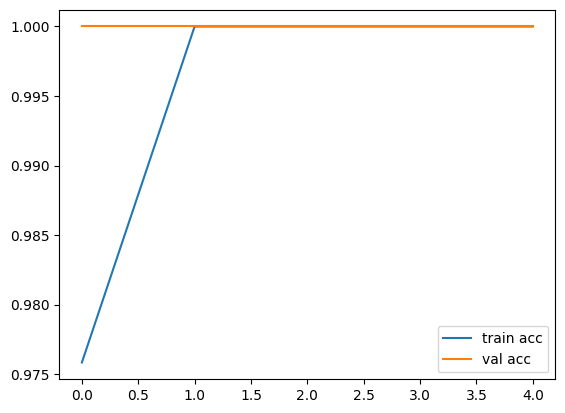

In [ ]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

# Paths
base_dir = "/content/drive/MyDrive/pedestrian_dataset/frames"

# ImageDataGenerator to read images
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = datagen.flow_from_directory(
    base_dir,
    target_size=(128, 128),
    batch_size=32,
    subset="training",
    class_mode="binary"
)

val_gen = datagen.flow_from_directory(
    base_dir,
    target_size=(128, 128),
    batch_size=32,
    subset="validation",
    class_mode="binary"
)

# Simple CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classifier: day/night
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=5
)

# Plot training results
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

# Save model
model.save("/content/drive/MyDrive/pedestrian_dataset/day_night_classifier.h5")


In [ ]:
!pip install ultralytics

In [ ]:
import os
import shutil
from ultralytics import YOLO

# Paths
input_dir = "/content/drive/MyDrive/pedestrian_dataset/frames/"
output_dir = "/content/drive/MyDrive/pedestrian_dataset/organized/"

# Create train folders
for split in ["day", "night"]:
    for cls in ["pedestrian", "no_pedestrian"]:
        os.makedirs(os.path.join(output_dir, split, cls), exist_ok=True)

# Load YOLOv8 pretrained (COCO, class 0 = person)
model = YOLO("yolov8n.pt")

# Function to check pedestrian presence
def has_pedestrian(image_path):
    results = model(image_path, verbose=False)
    for r in results:
        if 0 in r.boxes.cls.tolist():  # 0 = person class
            return True
    return False

# Go through each folder
for split in ["day", "night"]:
    folder_path = os.path.join(input_dir, split)
    save_path = os.path.join(output_dir, split)

    for fname in os.listdir(folder_path):
        if not fname.lower().endswith((".jpg", ".png", ".jpeg")):
            continue
        img_path = os.path.join(folder_path, fname)

        # Detect pedestrian
        if has_pedestrian(img_path):
            dest = os.path.join(save_path, "pedestrian", fname)
        else:
            dest = os.path.join(save_path, "no_pedestrian", fname)

        shutil.copy(img_path, dest)

print("✅ Dataset organized into pedestrian / no_pedestrian folders.")


✅ Dataset organized into pedestrian / no_pedestrian folders.


In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# -------------------------
# 1. Define paths
# -------------------------
base_dir = "/content/drive/MyDrive/pedestrian_dataset/organized"

# -------------------------
# 2. Image generators
# -------------------------
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,   # 80% train, 20% val
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    subset='training',
    class_mode='categorical'
)

val_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    subset='validation',
    class_mode='categorical'
)

# -------------------------
# 3. Build Transfer Learning Model
# -------------------------
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False   # freeze pretrained layers initially

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
predictions = Dense(2, activation="softmax")(x)  # Change to 2 categories for day/night

model = Model(inputs=base_model.input, outputs=predictions)

# -------------------------
# 4. Compile
# -------------------------
model.compile(optimizer=Adam(1e-4), loss="categorical_crossentropy", metrics=["accuracy"])

# -------------------------
# 5. Train
# -------------------------
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5
)

# -------------------------
# 6. Fine-tune (optional, unfreeze some layers)
# -------------------------
base_model.trainable = True
model.compile(optimizer=Adam(1e-5), loss="categorical_crossentropy", metrics=["accuracy"])

history_finetune = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5
)

# -------------------------
# 7. Save Model
# -------------------------
model.save("/content/drive/MyDrive/pedestrian_dataset/pedestrian_classifier.h5")
print("✅ Model saved successfully!")

Found 1780 images belonging to 2 classes.
Found 444 images belonging to 2 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
56/56 ━━━━━━━━━━━━━━━━━━━━ 98s 1s/step - accuracy: 0.8345 - loss: 0.3886 - val_accuracy: 1.0000 - val_loss: 0.0796
Epoch 2/5
56/56 ━━━━━━━━━━━━━━━━━━━━ 54s 975ms/step - accuracy: 0.9796 - loss: 0.1041 - val_accuracy: 1.0000 - val_loss: 0.0335
Epoch 3/5
56/56 ━━━━━━━━━━━━━━━━━━━━ 54s 975ms/step - accuracy: 0.9970 - loss: 0.0482 - val_accuracy: 1.0000 - val_loss: 0.0182
Epoch 4/5
56/56 ━━━━━━━━━━━━━━━━━━━━ 55s 981ms/step - accuracy: 0.9974 - loss: 0.0299 - val_accuracy: 1.0000 - val_loss: 0.0127
Epoch 5/5
56/56 ━━━━━━━━━━━━━━━━━━━━ 54s 962ms/step - accuracy: 1.0000 - loss: 0.0208 - val_accuracy: 1.0000 - val_loss: 0.0089
Epoch 1/2
56/56 ━━━━━━━━━━━━━━━━━━━━ 146s 2s/step - accuracy: 0.9730 - loss: 0.1388 - val_accuracy: 1.0000 - val_loss: 0.0044
Epoch 2/2
56/56 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 1.0000 - loss: 0.0140 - val_accuracy: 1.0000 - val_loss: 0.0048


✅ Model saved successfully!


1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
Prediction: Pedestrian Present (Confidence: 0.98)


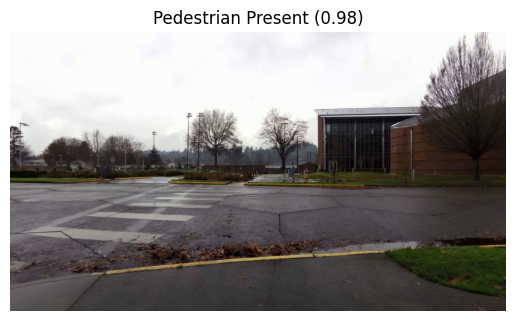

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load your trained model
# Check the correct filename and path for your saved model
model = keras.models.load_model("/content/drive/MyDrive/pedestrian_dataset/pedestrian_classifier.h5")

# Load a single test image
# Ensure this path points to an actual image file in your Google Drive
img_path = "/content/drive/MyDrive/pedestrian_dataset/frames/day/crosswalk_frame0.jpg"  # Example path, change to an existing image file
img = cv2.imread(img_path)

# Check if the image was loaded successfully
if img is None:
    print(f"Error loading image from {img_path}. Please check the path.")
else:
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR → RGB

    # Resize to the size your model expects (224x224 based on your training code)
    IMG_SIZE = (224, 224) # Use the same size as trained model
    img_resized = cv2.resize(img_rgb, IMG_SIZE)
    img_array = img_resized / 255.0   # normalize
    img_array = np.expand_dims(img_array, axis=0)  # add batch dimension

    # Predict
    prediction = model.predict(img_array)[0][0]

    # Interpret result (assuming binary classification: 0 or 1)
    # The model was trained on pedestrian vs no_pedestrian, not day/night.
    # Adjusting interpretation based on previous training goal.
    label = "Pedestrian Present" if prediction > 0.5 else "No Pedestrian Present"
    confidence = prediction if prediction > 0.5 else 1 - prediction

    print(f"Prediction: {label} (Confidence: {confidence:.2f})")

    # Show image
    plt.imshow(img_rgb)
    plt.title(f"{label} ({confidence:.2f})")
    plt.axis("off")
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Predicted class: no_pedestrian


/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['input_layer_1']]
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


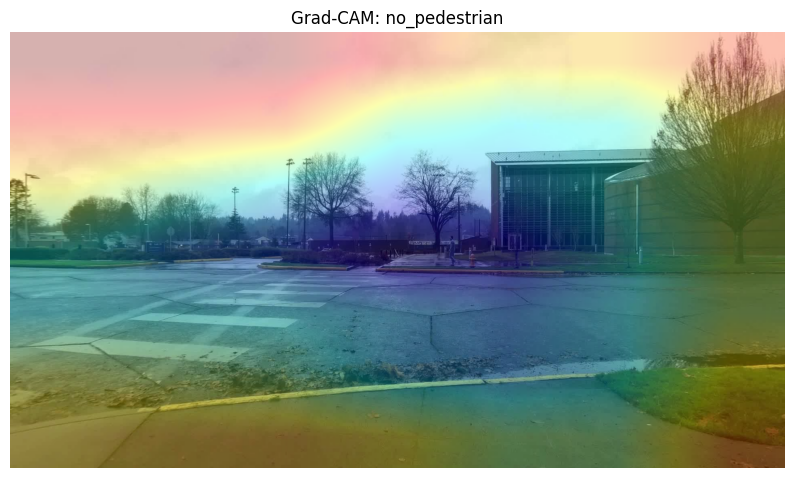

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import cv2

# Load the trained model
# Check the correct filename and path for your saved model
model = load_model("/content/drive/MyDrive/pedestrian_dataset/pedestrian_classifier.h5") # Changed extension to .h5

# Choose an image to explain
img_path = "/content/drive/MyDrive/pedestrian_dataset/frames/day/crosswalk_frame0.jpg"  # update with your image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict class
preds = model.predict(img_array)
pred_class = np.argmax(preds[0])
# Updated class names to reflect the model's training purpose (pedestrian vs. no_pedestrian)
class_names = ["no_pedestrian", "pedestrian"] # Assuming class 0 is no_pedestrian and class 1 is pedestrian based on training setup

print("Predicted class:", class_names[pred_class])

# Grad-CAM implementation
# You need to find the correct last convolutional layer name for your specific MobileNetV2 model
# You can inspect model.summary() to find the name. It might be different from "Conv_1"
# Let's assume the last convolutional layer is named 'Conv_1' for now, but you may need to verify.
try:
    last_conv_layer_name = None
    for layer in reversed(model.layers):
        if isinstance(layer, tf.keras.layers.Conv2D):
            last_conv_layer_name = layer.name
            break

    if last_conv_layer_name is None:
        raise ValueError("Could not find a Conv2D layer in the model.")

    last_conv_layer = model.get_layer(last_conv_layer_name)

    # Create a model that maps the input image to the last conv layer outputs and predictions
    grad_model = tf.keras.models.Model([model.inputs], [last_conv_layer.output, model.output])

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, pred_class]

    # Get gradients of the predicted class w.r.t output feature map
    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Weight the output feature map with the gradients
    conv_outputs = conv_outputs.numpy()[0]
    pooled_grads = pooled_grads.numpy()
    for i in range(pooled_grads.shape[-1]):
        conv_outputs[:, :, i] *= pooled_grads[i]

    # Create heatmap
    heatmap = np.mean(conv_outputs, axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)

    # Load original image
    img_orig = cv2.imread(img_path)
    img_orig = cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB)
    heatmap = cv2.resize(heatmap, (img_orig.shape[1], img_orig.shape[0]))
    heatmap = np.uint8(255 * heatmap)

    # Overlay heatmap on image
    heatmap_img = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted(img_orig, 0.7, heatmap_img, 0.3, 0)

    # Plot result
    plt.figure(figsize=(10, 6))
    plt.imshow(superimposed_img)
    plt.axis('off')
    plt.title(f"Grad-CAM: {class_names[pred_class]}")
    plt.show()

except ValueError as e:
    print(f"Error during Grad-CAM: {e}")
    print("Please check the model architecture and ensure there is a Conv2D layer, and potentially update 'last_conv_layer_name' if needed.")

In [ ]:
import numpy as np
import cv2
import os
from tensorflow.keras.utils import to_categorical

# Paths
day_path = '/content/drive/MyDrive/pedestrian_dataset/frames/day/'
night_path = '/content/drive/MyDrive/pedestrian_dataset/frames/night/'

def load_images_from_folder(folder, label, frame_count=3, max_images=200):
    images = []
    labels = []
    # Filter only image files and limit to max_images
    files = sorted([f for f in os.listdir(folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])[:max_images]
    print(f"Processing folder: {folder}, found {len(files)} image files.")
    for i in range(len(files) - frame_count + 1):
        stacked_frames = []
        valid_frames_count = 0
        for j in range(frame_count):
            img_path = os.path.join(folder, files[i + j])
            img = cv2.imread(img_path)

            if img is None:
                print(f"Warning: Could not load image: {img_path}. Skipping this frame sequence.")
                stacked_frames = []
                break

            img = cv2.resize(img, (224, 224))
            img = img / 255.0  # Normalize
            stacked_frames.append(img)
            valid_frames_count += 1

        if valid_frames_count == frame_count:
            stacked_frames = np.concatenate(stacked_frames, axis=-1)
            images.append(stacked_frames)
            labels.append(label)
        else:
            print(f"Skipped a sequence starting with {files[i]} due to loading errors.")

    return np.array(images), np.array(labels)

# Example usage with max_images set to 200
day_images, day_labels = load_images_from_folder(day_path, label=0, max_images=100)
night_images, night_labels = load_images_from_folder(night_path, label=1, max_images=100)

# Combine and shuffle
X = np.concatenate((day_images, night_images), axis=0)
y = np.concatenate((day_labels, night_labels), axis=0)
y = to_categorical(y, num_classes=2)

print("✅ Image stacking and labeling complete.")
print(f"Total sequences: {X.shape[0]}")


Processing folder: /content/drive/MyDrive/pedestrian_dataset/frames/day/, found 100 image files.
Processing folder: /content/drive/MyDrive/pedestrian_dataset/frames/night/, found 100 image files.
✅ Image stacking and labeling complete.
Total sequences: 196


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Define the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define a smaller model
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 9)),  # Reduced filters
    Conv2D(32, (3, 3), activation='relu'),
    Flatten(),
    Dense(32, activation='relu'),   # Much smaller Dense layer
    Dropout(0.5),                   # Helps avoid overfitting
    Dense(2, activation='softmax')  # Output layer for classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Show the model summary
model.summary()

# Train the model
history = model.fit(X, y, epochs=4, batch_size=16, validation_split=0.2)

# Save the model
model.save('/content/drive/MyDrive/pedestrian_dataset/pedestrian_sequence_model.h5')
print("✅ Model trained and saved successfully!")


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 222, 222, 16)   │         1,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 220, 220, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1548800)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │    49,561,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,567,650 (189.09 MB)

 Trainable params: 49,567,650 (189.09 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/4
10/10 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.6281 - loss: 8.9138 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/4
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.9899 - loss: 0.0504 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/4
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/4
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 1.0000 - loss: 3.3908e-07 - val_accuracy: 1.0000 - val_loss: 0.0000e+00


✅ Model trained and saved successfully!


In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from IPython.display import HTML
from base64 import b64encode

# Load model
model = load_model('/content/drive/MyDrive/pedestrian_dataset/pedestrian_sequence_model.h5') # Corrected filename

# Paths
input_video_path = '/content/drive/MyDrive/pedestrian_dataset/videos/VID20250916162253.mp4' # Example path, change as needed
output_video_path = '/content/drive/MyDrive/pedestrian_dataset/videos/output_with_pedestrian.mp4'

# Open video
cap = cv2.VideoCapture(input_video_path)

width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

# Video writer
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

frame_count = 3
frames = []

# Background subtractor
fgbg = cv2.createBackgroundSubtractorMOG2(history=500, varThreshold=100, detectShadows=False)

print(f"Processing video: {input_video_path}")


while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    img = cv2.resize(frame, (224, 224))
    img = img / 255.0
    frames.append(img)

    # Only attempt prediction and background subtraction when we have enough frames
    if len(frames) == frame_count:
        stacked = np.concatenate(frames, axis=-1)
        stacked = np.expand_dims(stacked, axis=0)

        # Predict using the sequence model
        # Based on the training in Gt6X9-9gKoK4, this model is for Day/Night classification
        pred = model.predict(stacked, verbose=0) # verbose=0 to suppress prediction progress
        class_id = np.argmax(pred)
        day_night_label = "Day" if class_id == 0 else "Night"

        # Pedestrian detection using background subtraction (applied to the current frame)
        fgmask = fgbg.apply(frame)

        # Morphological operations to clean the mask
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
        fgmask = cv2.morphologyEx(fgmask, cv2.MORPH_OPEN, kernel)

        # Find contours in the mask
        contours, _ = cv2.findContours(fgmask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Threshold to consider if a pedestrian is present based on contour area
        # Adjust the area threshold (500) based on your video and expected pedestrian size
        pedestrian_present = any(cv2.contourArea(cnt) > 500 for cnt in contours)
        pedestrian_label = "Pedestrian Present" if pedestrian_present else "No Pedestrian"

        # Overlay labels on the frame (on the original frame size)
        cv2.putText(frame, f'Time of Day: {day_night_label}', (10, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

        cv2.putText(frame, f'Pedestrian Status: {pedestrian_label}', (10, 70),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)

        # Write the frame to output
        out.write(frame)

        # Remove the oldest frame from the sequence
        frames.pop(0)
    else:
         # If not enough frames yet, just write the original frame without labels
         out.write(frame)


cap.release()
out.release()

print("✅ Video processing complete!")

# Display video in notebook
try:
    mp4 = open(output_video_path, 'rb').read()
    data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
    print("\nDisplaying output video:")
    display(HTML(f"""
    <video width="640" height="480" controls>
      <source src="{data_url}" type="video/mp4">
    </video>
    """))
except FileNotFoundError:
    print(f"Error: Output video file not found at {output_video_path}. It might not have been created due to issues during processing.")
except Exception as e:
    print(f"An error occurred while trying to display the video: {e}")